In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./Iris-two-label.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
x1 = data['SepalLengthCm'].values
x2 = data['PetalLengthCm'].values
y = data['Species'].values

#X,Y and bias term
# bias = np.negative(np.ones(len(x1)))
bias = np.full(len(x1),-1)
X = np.array(list(zip(x1,x2)))
# print(X)

#Nominal to numeric
df = pd.DataFrame(data=y, dtype='category', columns=['label'])
Y = df['label'].cat.codes
Y = np.array(Y)
Y[Y == 0 ] = -1

In [3]:
def svm(X, Y):
    #Initialize weight
    w = np.zeros(len(X[0]))
    
    #Learning Rate
    lr = 0.2
    
    #Epoch limit
    epochs = 300000
    
    #variable fo storing misclassification errors
    errors =[]
    lamda = 1
    #training + gradient descent
    for epoch in range(1,epochs):
        error = 0 
#         for i in range(1,len(X)):
        for i,x in enumerate(X):
            
            #missclassify | stochastic gradient descent\
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + lr*(Y[i] * X[i] - 2* (lamda/epoch) *w)
                error = 1
            #regulizer for correctly classified
            else:
                w = w + lr * (-2 * (lamda/epoch) * w)
        #store error    
        errors.append(error)
    
    #plot le error
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified Errors')
    plt.show()
    
    return w

C:\Users\ammarsyatbi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


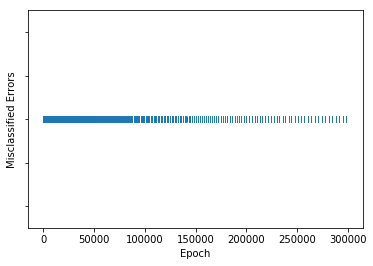

[-1.56372603  3.15245867]


In [4]:
w = svm(X,Y)
print (w)



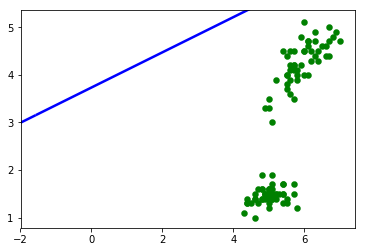

In [5]:

for i,x in enumerate (X):
    plt.scatter( x[0], x[1], s=20, color ="green", linewidths = 2)

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')
plt.show()

In [6]:
import math
print (math.sqrt(w[0]**2+w[1]**2))



3.518982063159229
